# Data Preprocessing Notebook
### Team 10

## Data Preprocessing


In [1]:
# Importing the essential libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import random
from collections import Counter

import matplotlib.pyplot as plt





In [2]:
df1 =  pd.read_csv('covid_19_data_2may.csv')

C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718080 entries, 0 to 718079
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Case_Type                             718080 non-null  object 
 1   People_Total_Tested_Count             2352 non-null    float64
 2   Cases                                 718080 non-null  int64  
 3   Difference                            718080 non-null  int64  
 4   Date                                  718080 non-null  object 
 5   Combined_Key                          718080 non-null  object 
 6   Country_Region                        718080 non-null  object 
 7   Province_State                        680952 non-null  object 
 8   Admin2                                663816 non-null  object 
 9   iso2                                  717672 non-null  object 
 10  iso3                                  717876 non-null  object 
 11  

In [4]:
df1.head()

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
0,Confirmed,NaN,0,0,2/3/2020,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.8182,8.2275,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
1,Deaths,NaN,0,0,3/1/2020,Cyprus,Cyprus,NaN,NaN,CY,CYP,NaN,35.1264,33.4299,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
2,Confirmed,NaN,23,0,4/21/2020,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,ATG,NaN,17.0608,-61.7964,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
3,Deaths,NaN,0,0,2/11/2020,Jamaica,Jamaica,NaN,NaN,JM,JAM,NaN,18.1096,-77.2975,2961161.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
4,Confirmed,NaN,0,0,2/6/2020,Belize,Belize,NaN,NaN,BZ,BLZ,NaN,17.1899,-88.4976,397621.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718080 entries, 0 to 718079
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Case_Type                             718080 non-null  object 
 1   People_Total_Tested_Count             2352 non-null    float64
 2   Cases                                 718080 non-null  int64  
 3   Difference                            718080 non-null  int64  
 4   Date                                  718080 non-null  object 
 5   Combined_Key                          718080 non-null  object 
 6   Country_Region                        718080 non-null  object 
 7   Province_State                        680952 non-null  object 
 8   Admin2                                663816 non-null  object 
 9   iso2                                  717672 non-null  object 
 10  iso3                                  717876 non-null  object 
 11  

In [6]:
df1.isnull().sum()

Case_Type                                    0
People_Total_Tested_Count               715728
Cases                                        0
Difference                                   0
Date                                         0
Combined_Key                                 0
Country_Region                               0
Province_State                           37128
Admin2                                   54264
iso2                                       408
iso3                                       204
FIPS                                     76092
Lat                                      21420
Long                                     21420
Population_Count                         21420
People_Hospitalized_Cumulative_Count    715728
Data_Source                                  0
Prep_Flow_Runtime                            0
dtype: int64

In [7]:
## We are dropiing the unnecessay columns from the dataset.
df1.drop(['Combined_Key','FIPS','Prep_Flow_Runtime','Data_Source',\
          'People_Total_Tested_Count','People_Hospitalized_Cumulative_Count','iso2','iso3','Population_Count'],inplace = True,axis =1)

In [8]:
df1.fillna(np.NaN,inplace = True)

In [9]:
df1.Long.dropna(inplace = True)
df1.Lat.dropna(inplace = True)

In [10]:
# Renaminig the Column Admin2, to make it wasy to understand.
df1.rename(columns={"Admin2": "County_name_USonly"},inplace = True)

In [11]:
df1.Date =pd.to_datetime(df1.Date)
df1.Cases = pd.to_numeric(df1.Cases)


In [12]:
#Creating a list of all countries and continents.
asia = ['Afghanistan', 'Bahrain', 'United Arab Emirates','Saudi Arabia', 'Kuwait', 'Qatar', 'Oman','Thailand'
'Sultanate of Oman','Lebanon', 'Iraq', 'Yemen', 'Pakistan', 'Lebanon', 'Philippines', 'Jordan','India','China','Mauritius']

europe = ['Germany','Spain', 'France', 'Italy', 'Netherlands', 'Norway', 'Sweden','Czech Republic', 'Finland',
'Denmark', 'Czech Republic', 'Switzerland', 'UK', 'UK&I', 'Poland', 'Greece','Austria',
'Bulgaria', 'Hungary', 'Luxembourg', 'Romania' , 'Slovakia', 'Estonia', 'Slovenia','Portugal',
'Croatia', 'Lithuania', 'Latvia','Serbia', 'Estonia', 'ME', 'Iceland' ]

africa = ['Morocco', 'Tunisia', 'South Africa','Africa', 'ZA', 'Kenya','Reunion Island','Libya','St Helena','Comoros',
          'Reunion','Cape Verde','mozambique']

australia = ['Australia','New Caledonia','New Caledonia','Solomon Islands', 'New Zealand', 'French Polynesia', 'Samoa', 'Fiji']

north_america = ['Argentina', 'Cayman Islands', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
'Peru', 'Suriname', 'Uruguay', 'Venezuela', 'Antigua and Barbuda', 'Bahamas', 'Barbados',
'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala',
'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'USA','US']

south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
'Peru', 'Suriname', 'Uruguay', 'Venezuela']


list_of_continents=['Asia','Europe','Africa','Australia','North America', 'South America']



In [13]:
#Function to segregate countries into continents
def get_continent(country):
    if country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in africa:
        return "Africa"
    elif country in australia:
        return "Australia"
    elif country in north_america:
        return "North America"
    elif country in south_america:
        return "South America"
    else:
        return (np.random.choice(list_of_continents))

#Applying get_continent function to dataset to group data into continents
df1['Continent'] = df1['Country_Region'].apply(lambda x: get_continent(x))

In [14]:
df1.Case_Type.value_counts()

Confirmed    359040
Deaths       359040
Name: Case_Type, dtype: int64

In [15]:
# df1 = df1
df1 = df1 [['Cases','Case_Type',  'Difference', 'Date', 'Country_Region',
       'Province_State', 'County_name_USonly', 'Lat', 'Long', 'Continent']]

In [16]:
df1.head()

,Cases,Case_Type,Difference,Date,Country_Region,Province_State,County_name_USonly,Lat,Long,Continent
0,0,Confirmed,0,2020-02-03,Switzerland,NaN,NaN,46.8182,8.2275,Europe
1,0,Deaths,0,2020-03-01,Cyprus,NaN,NaN,35.1264,33.4299,Australia
2,23,Confirmed,0,2020-04-21,Antigua and Barbuda,NaN,NaN,17.0608,-61.7964,North America
3,0,Deaths,0,2020-02-11,Jamaica,NaN,NaN,18.1096,-77.2975,North America
4,0,Confirmed,0,2020-02-06,Belize,NaN,NaN,17.1899,-88.4976,North America


In [17]:
df1.to_csv('covid19_processed.csv',header=False,index = False)

## Visualizations

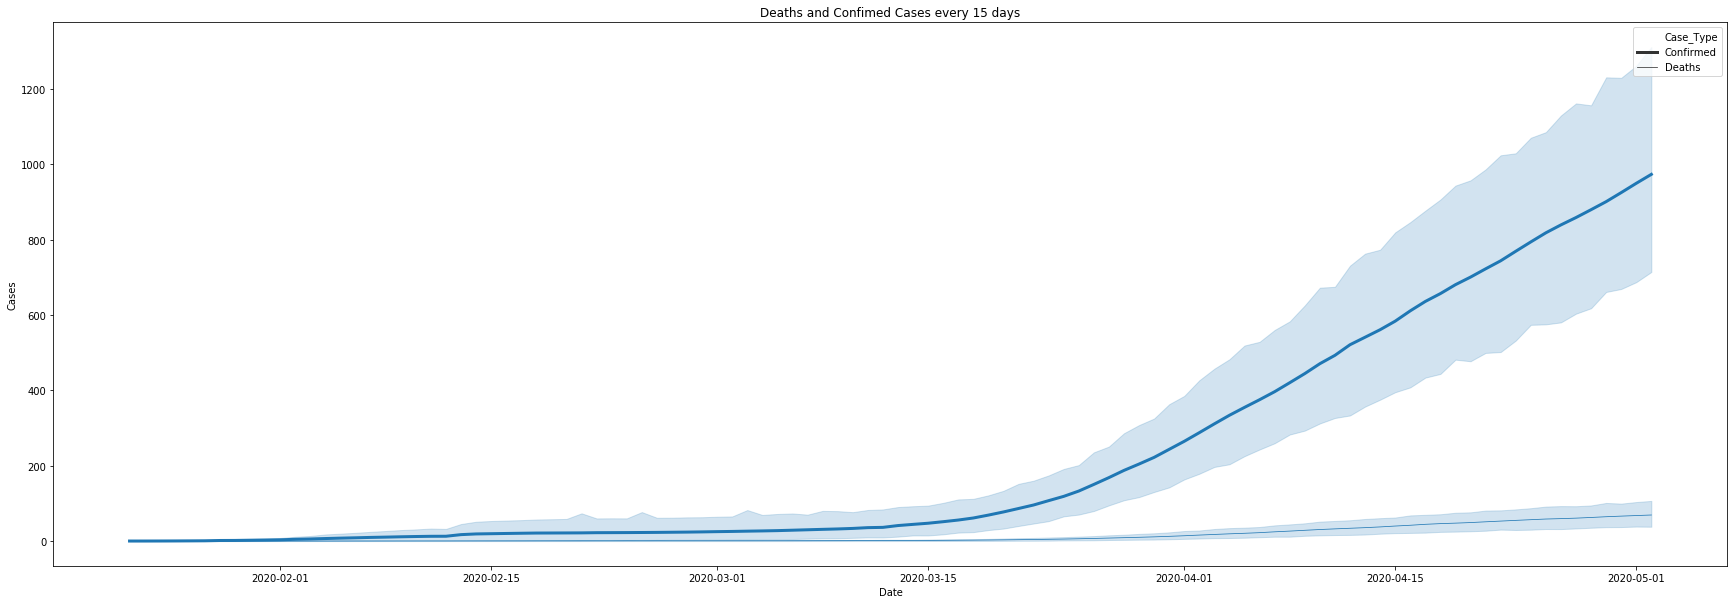

In [18]:
# Analysis of the Deaths and Confimed Cases every 15 days
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(30,10))
plt.title("Deaths and Confimed Cases every 15 days")
sns.lineplot(x='Date',y ='Cases',size='Case_Type',data=df1,ax=ax)

Text(0.5, 0, 'Number of Cases')

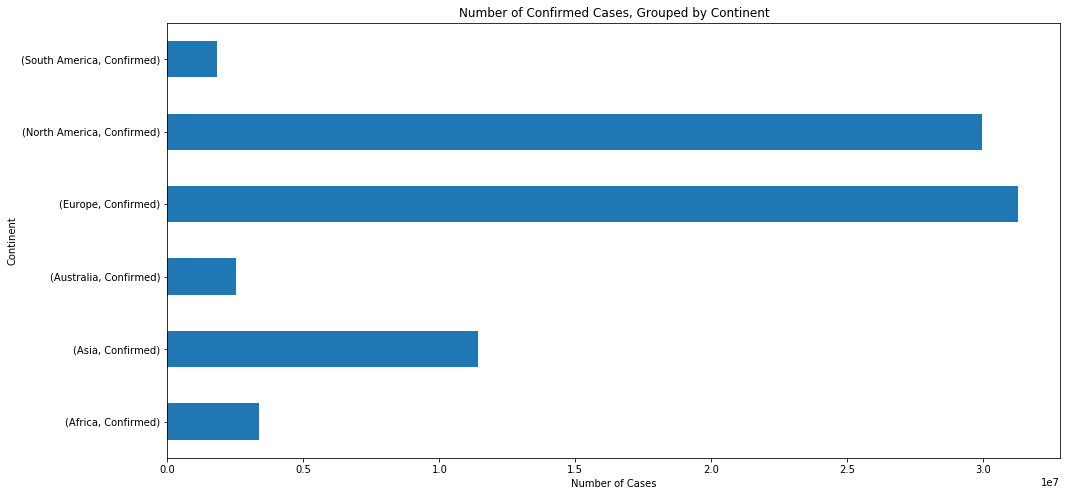

In [19]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(16, 8))
df1[df1.Case_Type == 'Confirmed'].groupby(['Continent', 'Case_Type']).sum()['Cases'].plot(kind='barh',
                                                              title='Number of Confirmed Cases, Grouped by Continent')
plt.ylabel('Continent')
plt.xlabel('Number of Cases')

Text(0.5, 0, 'Number of Cases')

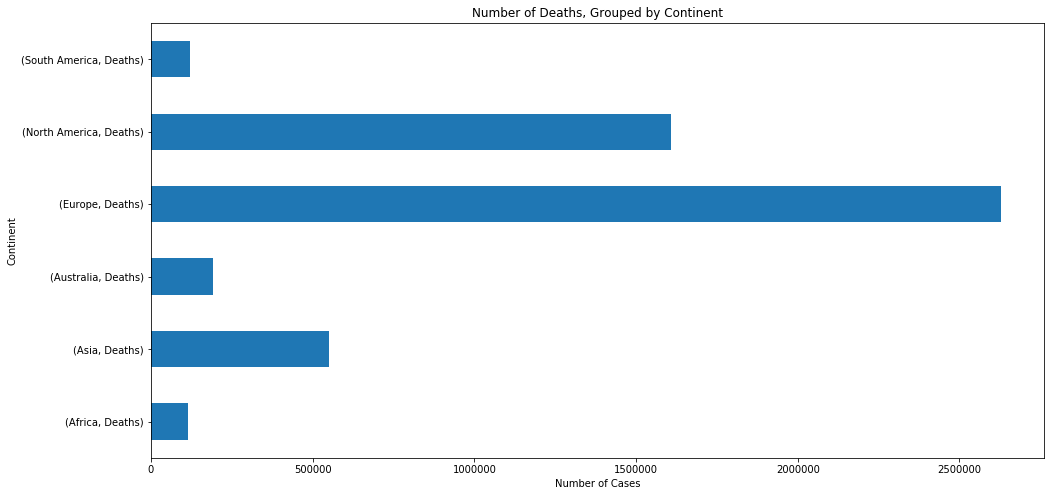

In [20]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(16, 8))
df1[df1.Case_Type == 'Deaths'].groupby(['Continent', 'Case_Type']).sum()['Cases'].plot(kind='barh',
                                                              title='Number of Deaths, Grouped by Continent')
plt.ylabel('Continent')
plt.xlabel('Number of Cases')

Text(0.5, 0, 'Number of Cases')

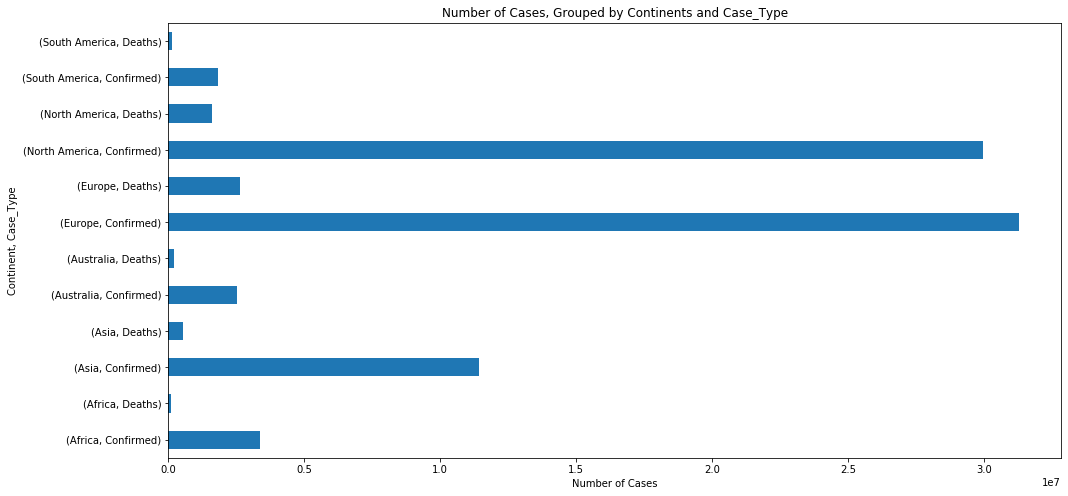

In [21]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(16, 8))
df1.groupby(['Continent', 'Case_Type']).sum()['Cases'].plot(kind='barh',
                                                              title='Number of Cases, Grouped by Continents and Case_Type')
plt.ylabel('Continent, Case_Type')
plt.xlabel('Number of Cases')

Text(0.5, 1.0, 'Deaths Vs Confirmed Cases all over the World')

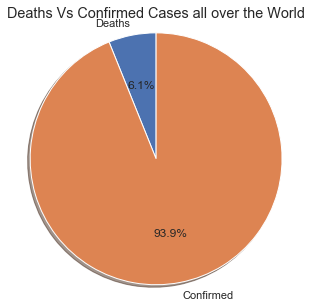

In [22]:
sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")

Cases_vals = [df1[(df1.Case_Type == 'Deaths')].Cases.sum(),df1[df1.Case_Type == 'Confirmed'].Cases.sum()]
f, ax = plt.subplots(figsize=(5, 5))
labels = ['Deaths', 'Confirmed']
plt.pie(Cases_vals, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axis = plt.axis('equal')
plt.style.use(('ggplot'))
plt.title('Deaths Vs Confirmed Cases all over the World')

Text(0.5, 0, 'Number of Cases')

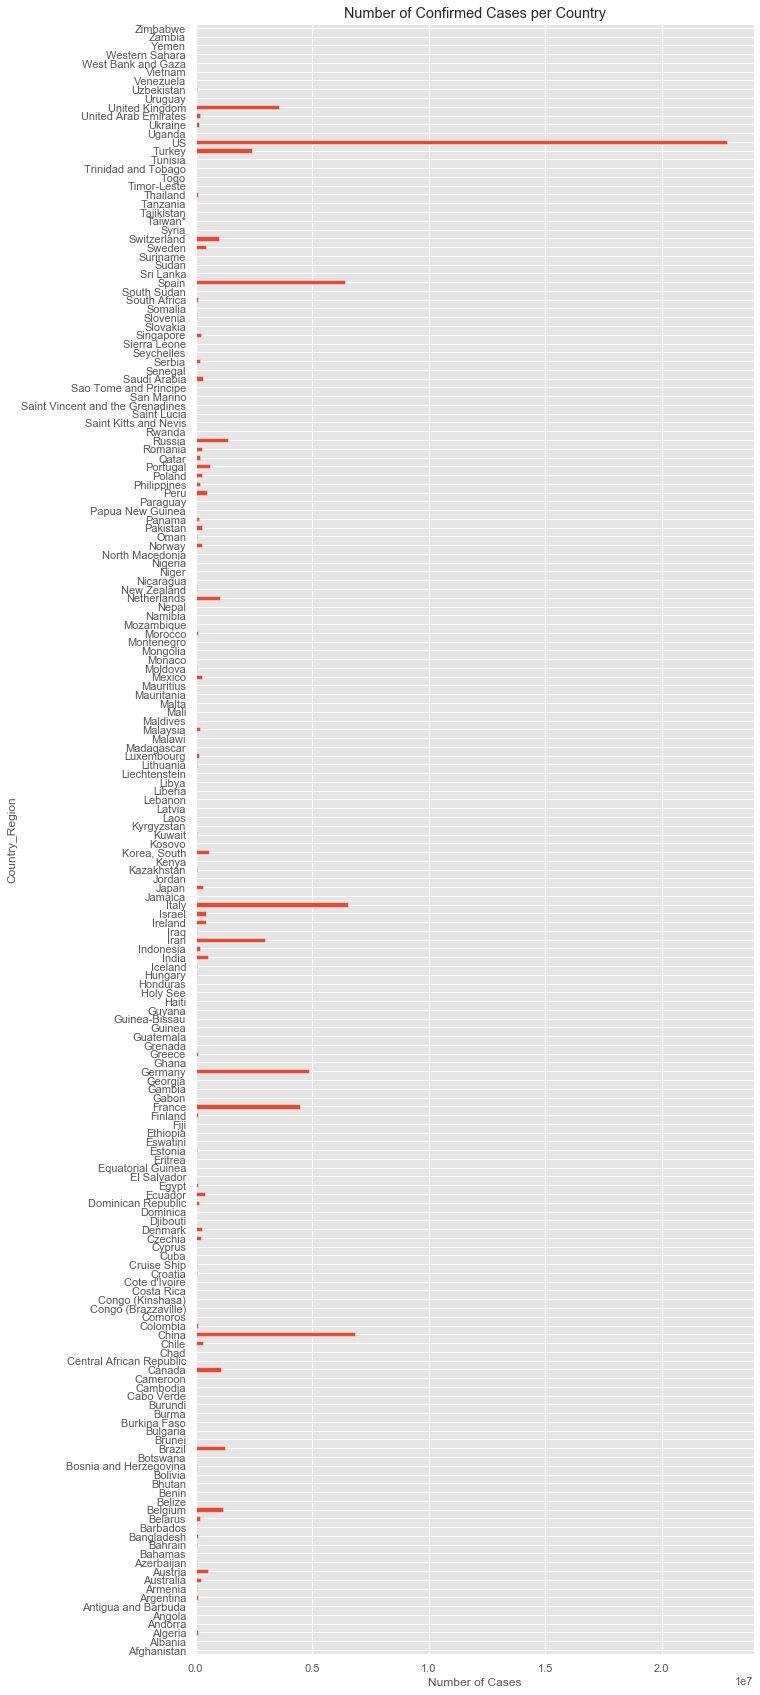

In [23]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(10,30))
df1[df1.Case_Type == 'Confirmed'].groupby(['Country_Region']).sum()['Cases'].plot(kind='barh',
                                                              title='Number of Confirmed Cases per Country')
plt.ylabel('Country_Region')
plt.xlabel('Number of Cases')

Text(0.5, 0, 'Number of Cases')

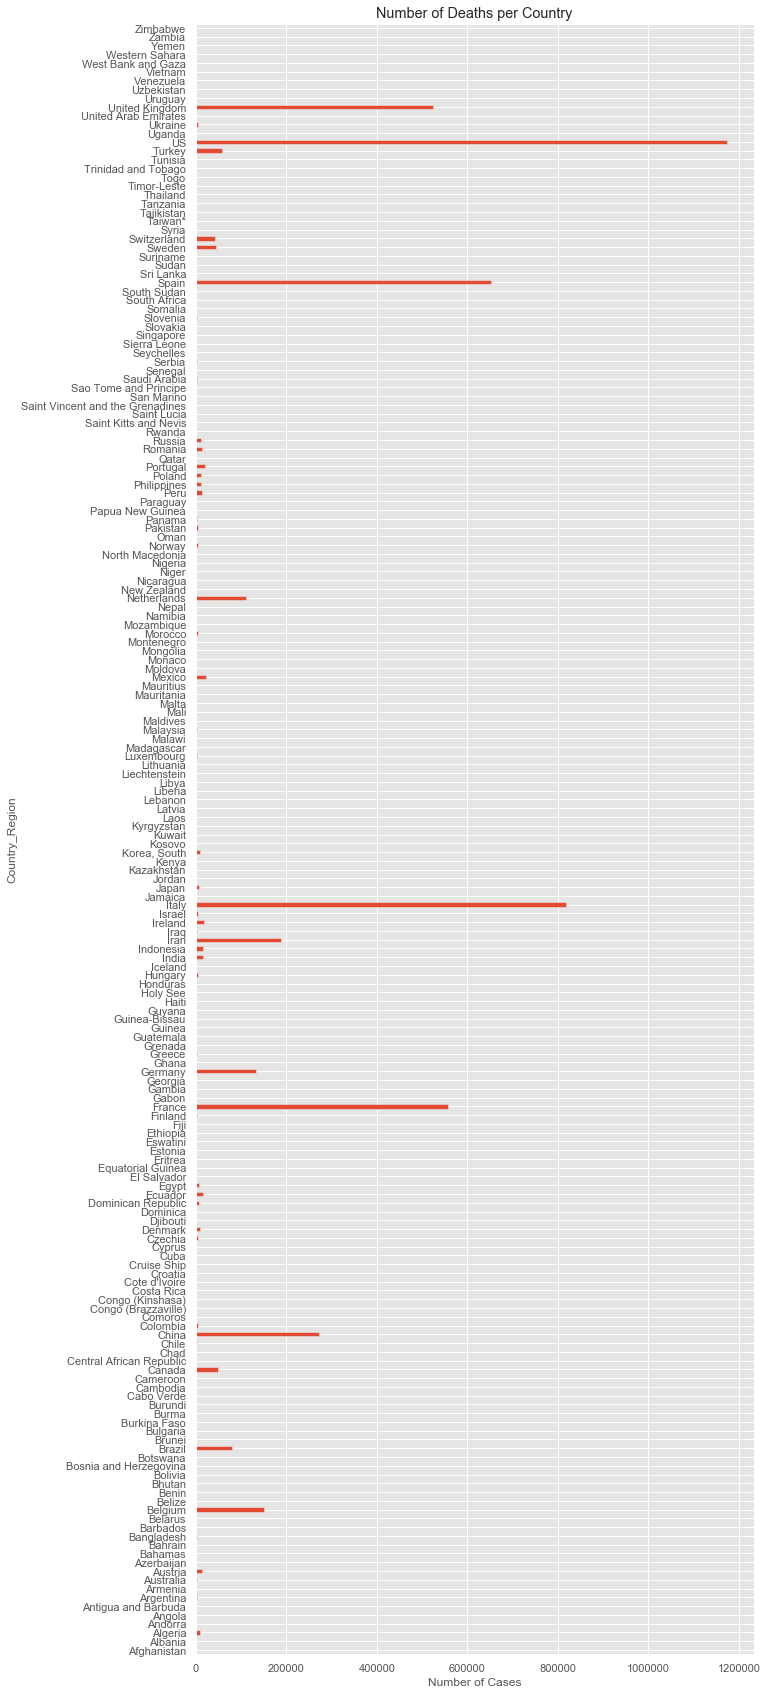

In [24]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(10,30))
df1[df1.Case_Type == 'Deaths'].groupby(['Country_Region']).sum()['Cases'].plot(kind='barh',
                                                              title='Number of Deaths per Country')
plt.ylabel('Country_Region')
plt.xlabel('Number of Cases')